In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
import warnings
import matplotlib.dates as mdates

%matplotlib inline
warnings.filterwarnings("ignore")

### Reading all .csv files and saving them in a dictionary with respective keys and deleting the second header

In [2]:
files = {'May': 'C:\\Users\\nikit\\Desktop\\RegenerationAcademy\\Project\\Data\\May.csv',
         'June': 'C:\\Users\\nikit\\Desktop\\RegenerationAcademy\\Project\\Data\\June.csv',
         'July':'C:\\Users\\nikit\\Desktop\\RegenerationAcademy\\Project\\Data\\July.csv',
         'August': 'C:\\Users\\nikit\\Desktop\\RegenerationAcademy\\Project\\Data\\August.csv',
         'September': 'C:\\Users\\nikit\\Desktop\\RegenerationAcademy\\Project\\Data\\September.csv',
         'October': 'C:\\Users\\nikit\\Desktop\\RegenerationAcademy\\Project\\Data\\October.csv'}

data = {}
for key, value in files.items():
    data[key] = pd.read_csv(value, header=[0,1], encoding="ISO-8859-1", index_col=0, delimiter=';')
    data[key].columns = data[key].columns.droplevel(-1)

### Identifying variables that interest us and correct the ones with faults

In [3]:
data['July']['total_feed_ton_h_pv'] = data["July"]['total_feed_ton_h_pv'].combine_first(data["July"]['total_feed_ton/h_pv'])

In [4]:
data['July'] = data['July'].drop(columns=['total_feed_ton/h_pv'])

In [5]:
for key, value in data.items():
    if 'total_feed_ton/h_pv' in value.columns:
        value.rename(columns = {'total_feed_ton/h_pv': 'total_feed_ton_h_pv'}, inplace=True)

### Creating an identical dictionary with the six DFs keeping only the needed columns

In [6]:
task1 = {}
for key, value in data.items():
    task1[key] = data[key][['date',
          'separator_speed_rpm_pv',
          'mill_dp_mbar_pv',
          'mill_motor_pwr_kw_pv',
          'mill_operation',
          'total_feed_ton_h_pv',
          'separator_pwr_kw_pv']]

### Concatenating them together into a big one

In [7]:
data = pd.concat([task1[d] for d in task1.keys()], ignore_index=True)

### Correcting bad formatting and typing

In [8]:
data = data[data[:]!='ERROR']

In [9]:
data.dropna(axis='index', inplace=True)

In [10]:
data.reset_index(drop=True, inplace=True)

In [11]:
data[data.columns[1:]] = data[data.columns[1:]].apply(lambda x: x.astype(float))

### Using filters to keep the variables during normal operation conditions

In [13]:
mask = (data['mill_motor_pwr_kw_pv']>500) & (data['mill_motor_pwr_kw_pv']<1500) & (data['total_feed_ton_h_pv']<80) & (data['total_feed_ton_h_pv']>40) & (data['mill_operation']==1)
data = data[mask].reset_index(drop=True)

### Isolating only the inputs and output

In [14]:
model_data = data[['date', 'separator_speed_rpm_pv', 'mill_dp_mbar_pv', 'separator_pwr_kw_pv']]

In [15]:
model_data.to_hdf('model1.h5', 'df')

### Visualization of the distributions of the respective inputs and important variables

### Total Feed - Cement type ii and iv

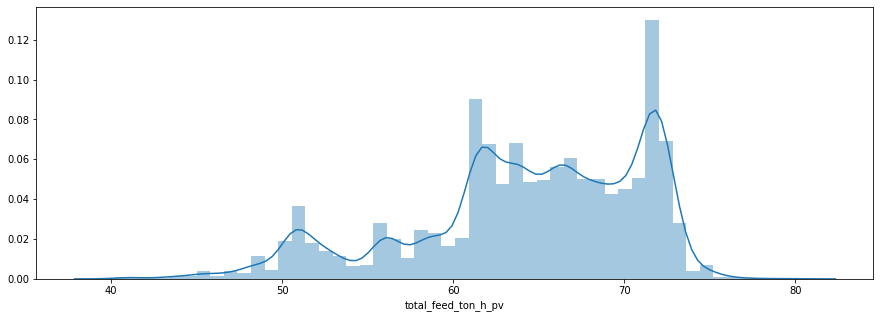

In [24]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_ii['total_feed_ton_h_pv'])

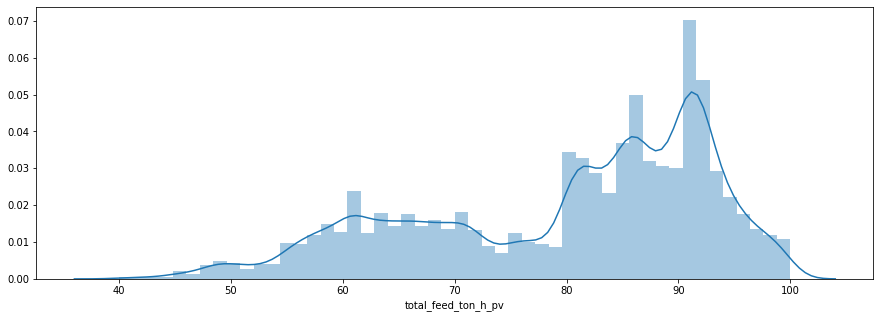

In [25]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_iv['total_feed_ton_h_pv'])

### Mill Motor Power - Cement type ii and iv

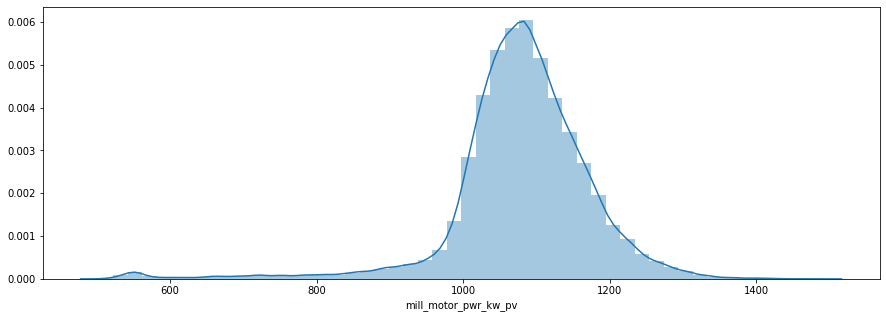

In [26]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_ii['mill_motor_pwr_kw_pv'])

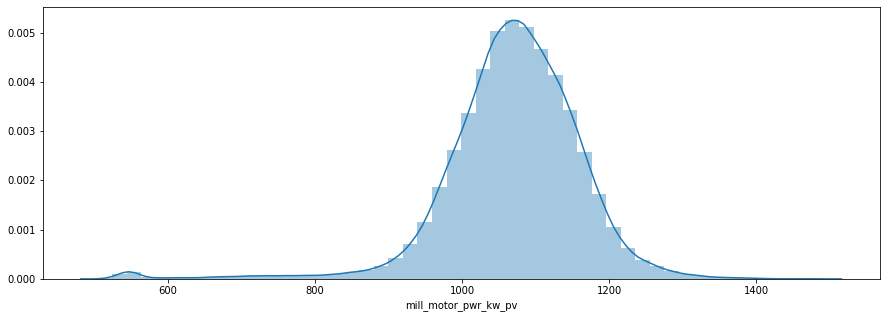

In [27]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_iv['mill_motor_pwr_kw_pv'])

### Mill DP - Cement type ii and iv

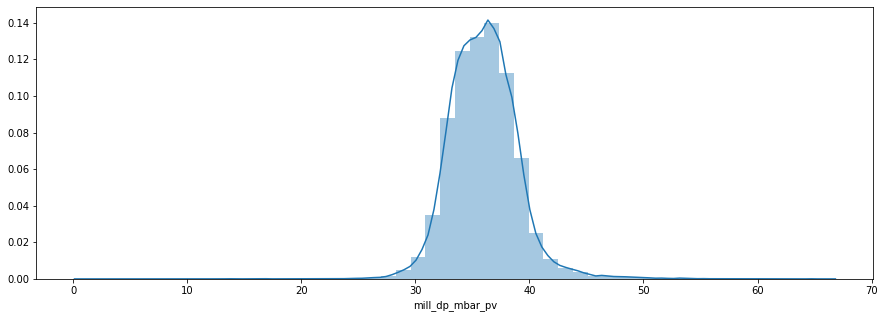

In [28]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_ii['mill_dp_mbar_pv'])

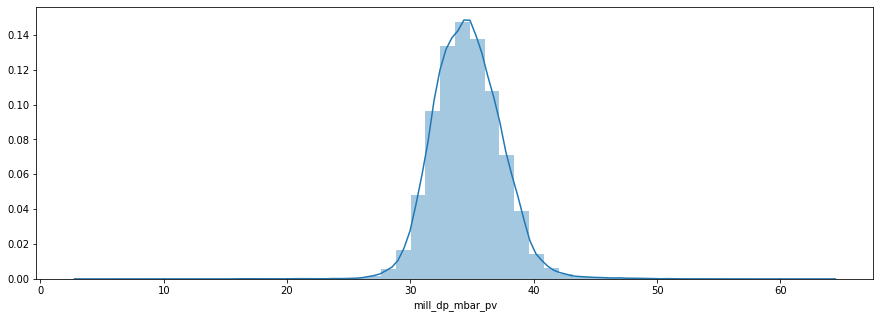

In [29]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_iv['mill_dp_mbar_pv'])

### Separator speed - Cement type ii and iv

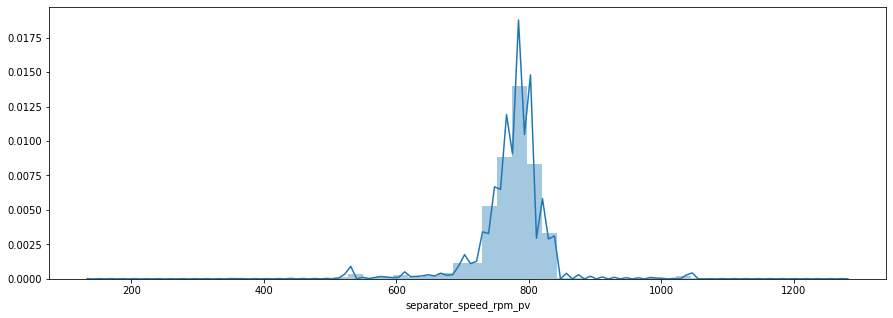

In [31]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_ii['separator_speed_rpm_pv'])
#plt.xlim(400, 900)

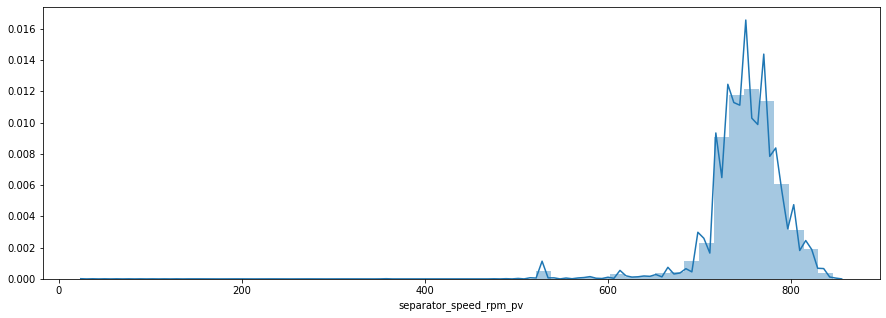

In [32]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_iv['separator_speed_rpm_pv'])
#plt.xlim(400, 900)

### Correlations between the inputs and important variables, and the output

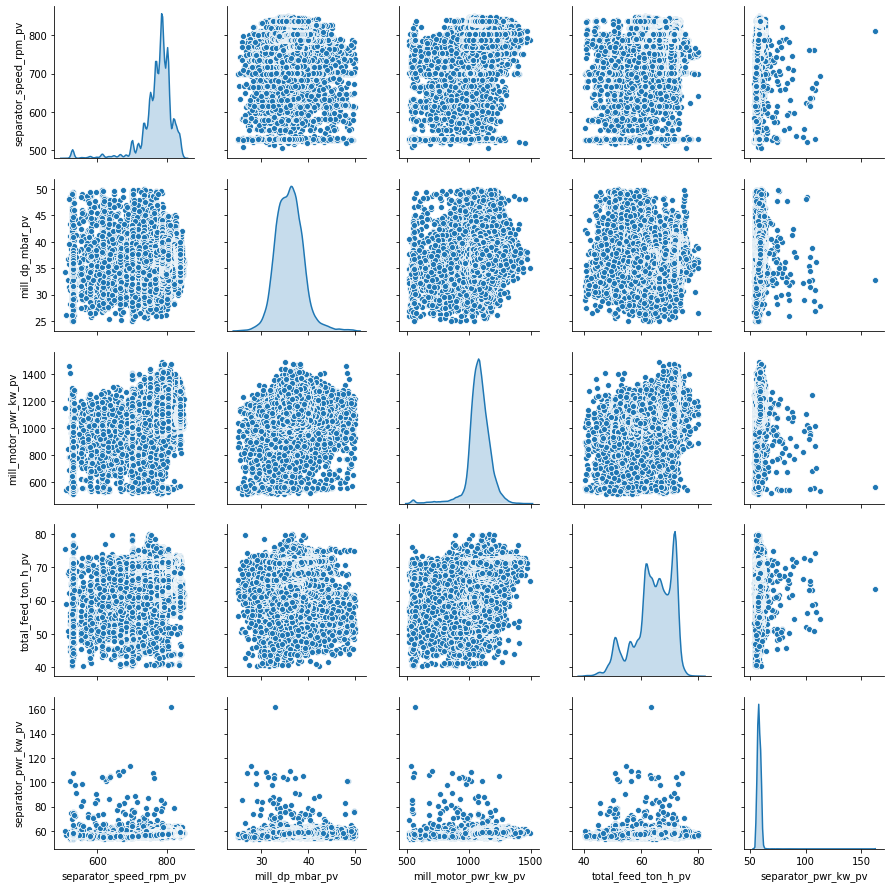

In [47]:
sns.pairplot(data_cem_ii,vars=['separator_speed_rpm_pv', 'mill_dp_mbar_pv', 'mill_motor_pwr_kw_pv' ,'total_feed_ton_h_pv',
            'separator_pwr_kw_pv'] , diag_kind="kde")

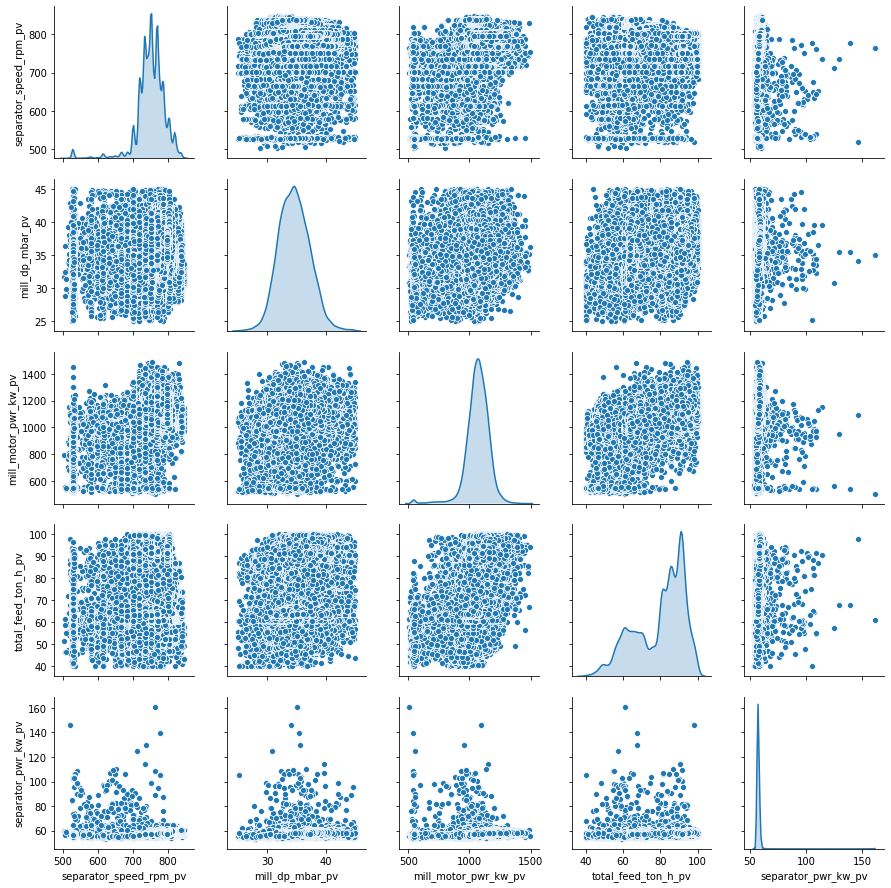

In [48]:
sns.pairplot(data_cem_iv,vars=['separator_speed_rpm_pv', 'mill_dp_mbar_pv', 'mill_motor_pwr_kw_pv' ,'total_feed_ton_h_pv',
            'separator_pwr_kw_pv'] , diag_kind="kde")

### Mill Motor Power and Total Feed through time visualization

### Pearson Correlation

In [ ]:
x=data[['separator_speed_rpm_pv','mill_dp_mbar_pv','mill_motor_pwr_kw_pv', 'total_feed_ton_h_pv', 'separator_pwr_kw_pv']]

In [79]:
cor

,separator_speed_rpm_pv,mill_dp_mbar_pv,mill_motor_pwr_kw_pv,total_feed_ton_h_pv,separator_pwr_kw_pv
separator_speed_rpm_pv,1.000000,0.190889,0.321434,-0.102747,0.338310
mill_dp_mbar_pv,0.190889,1.000000,0.164400,0.055096,0.343936
mill_motor_pwr_kw_pv,0.321434,0.164400,1.000000,0.301101,0.195396
total_feed_ton_h_pv,-0.102747,0.055096,0.301101,1.000000,-0.021031
separator_pwr_kw_pv,0.338310,0.343936,0.195396,-0.021031,1.000000


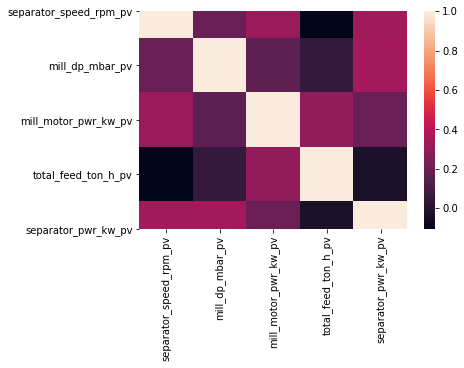

In [78]:
cor=x.corr()
sns.heatmap(cor)

### Spearman Correlation

In [80]:
corr2

,separator_speed_rpm_pv,mill_dp_mbar_pv,mill_motor_pwr_kw_pv,total_feed_ton_h_pv,separator_pwr_kw_pv
separator_speed_rpm_pv,1.000000,0.307386,0.136580,-0.224360,0.625037
mill_dp_mbar_pv,0.307386,1.000000,0.176807,0.102645,0.483387
mill_motor_pwr_kw_pv,0.136580,0.176807,1.000000,0.292724,0.330800
total_feed_ton_h_pv,-0.224360,0.102645,0.292724,1.000000,0.035230
separator_pwr_kw_pv,0.625037,0.483387,0.330800,0.035230,1.000000


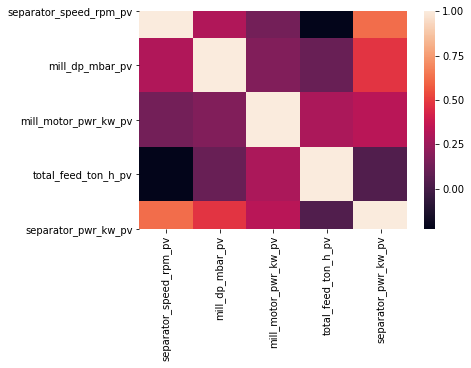

In [77]:
corr2=x.corr(method='spearman')
sns.heatmap(corr2)